In [17]:
import pandas as pd
import os
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_ratings(ratings_csv: str, data_dir: str = "/home/antoine/Ml_Ops_Movies_Reco/src/data/data/raw") -> pd.DataFrame:
    """
    Lit le fichier CSV contenant les évaluations des films.

    :param ratings_csv: Nom du fichier CSV contenant les évaluations.
    :param data_dir: Répertoire où se trouve le fichier CSV.
    :return: DataFrame contenant les évaluations.
    """
    data = pd.read_csv(os.path.join(data_dir, ratings_csv))
    print("Dataset ratings chargé")
    return data

def read_movies(movies_csv: str, data_dir: str = "/home/antoine/Ml_Ops_Movies_Reco/src/data/data/raw") -> pd.DataFrame:
    """
    Lit le fichier CSV contenant les informations sur les films.

    :param movies_csv: Nom du fichier CSV contenant les informations sur les films.
    :param data_dir: Répertoire où se trouve le fichier CSV.
    :return: DataFrame contenant les informations sur les films.
    """
    df = pd.read_csv(os.path.join(data_dir, movies_csv))
    print("Dataset movies chargé")
    return df

In [3]:
ratings = read_ratings('ratings.csv')

ratings.head()

Dataset ratings chargé


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
skim(ratings)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 20000263 │ │ int64       │ 3     │                                                        │
│ │ Number of columns │ 4        │ │ float64     │ 1     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ userId   │  0 │    0 │    69050 │    40040 │        1 │    34400 │    69140 │   103600 │   138500 │ ▇▇▇▇▇▇ │  │
│ │ movieId  │  0 │    0 │     9042 │    19790 │        1 │      902 │     2167 │     4770 │   131300 │   ▇    │  │
│ │ rating   │  0 │    0 │    3.526 │    1.052 │      0.5 │        3 │      3.5 │        4 │        5 │ ▁ ▂▅▇▅ │  │
│ │ timestam │  0 │    0 │ 11010000 │ 16220000 │ 78970000 │ 96680000 │ 11040000 │ 12260000 │ 14280000 │ ▅▇▇▇▆▅ │  │
│ │ p        │    │      │       00 │        0 │        0 │        0 │       00 │       00 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
movies = read_movies('movies.csv')

movies.head()

Dataset movies chargé


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
skim(movies)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 27278  │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50     ┃ p75      ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ movieId         │   0 │      0 │   59860 │   44430 │   1 │   6931 │   68070 │   100300 │  131300 │ ▇▂▂▃▅▅  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴────────┴─────────┴──────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ title                     │       0 │          0 │                          4.6 │                   125836 │  │
│ │ genres                    │       0 │          0 │                            1 │                    27770 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
movies.genres.nunique()

1342

In [8]:
df = ratings.merge(movies, on="movieId", how="left")

df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (CitÃ© des enfants ...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 20000263 │ │ int64       │ 3     │                                                        │
│ │ Number of columns │ 6        │ │ string      │ 2     │                                                        │
│ └───────────────────┴──────────┘ │ float64     │ 1     │                                                        │
│                                  └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ userId   │  0 │    0 │    69050 │    40040 │        1 │    34400 │    69140 │   103600 │   138500 │ ▇▇▇▇▇▇ │  │
│ │ movieId  │  0 │    0 │     9042 │    19790 │        1 │      902 │     2167 │     4770 │   131300 │   ▇    │  │
│ │ rating   │  0 │    0 │    3.526 │    1.052 │      0.5 │        3 │      3.5 │        4 │        5 │ ▁ ▂▅▇▅ │  │
│ │ timestam │  0 │    0 │ 11010000 │ 16220000 │ 78970000 │ 96680000 │ 11040000 │ 12260000 │ 14280000 │ ▅▇▇▇▆▅ │  │
│ │ p        │    │      │       00 │        0 │        0 │        0 │       00 │       00 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ title                     │       0 │          0 │                          4.1 │                 82087546 │  │
│ │ genres                    │       0 │          0 │                            1 │                 20000985 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

/tmp/ipykernel_32638/577718965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


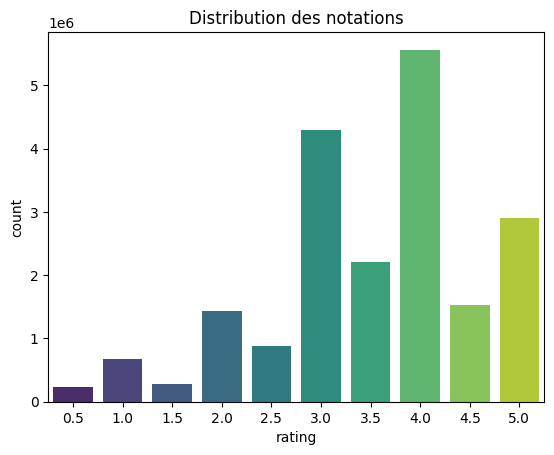

In [10]:
# Distribution des notations
sns.countplot(
    data = df,
    x="rating",palette="viridis")
plt.title("Distribution des notations")
plt.show()

/tmp/ipykernel_32638/1999954335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


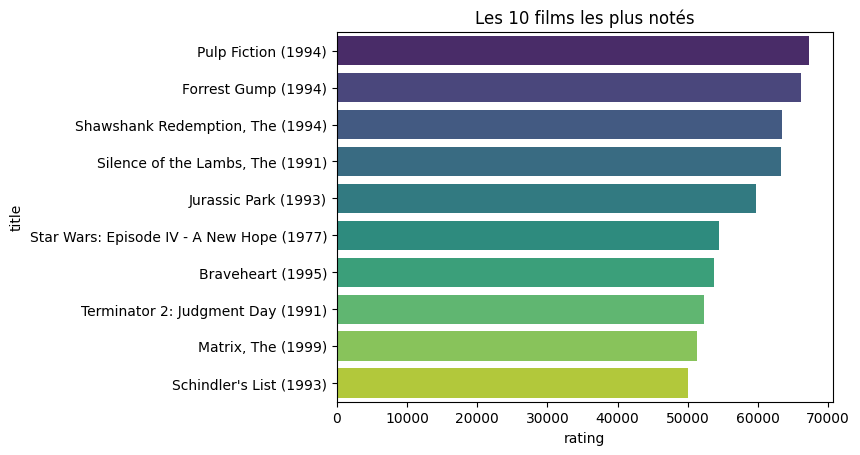

In [11]:
# 10 livres les mieux notés
df1 = df.groupby('title')['rating'].count().reset_index()

df1 = df1.sort_values(by='rating',ascending = False)

# df1.head(10).plot.bar(x ='title', y='rating')
sns.barplot(
    y='title',
    x='rating',
    data=df1.head(10),
    orient = 'h',
    palette="viridis")
plt.title('Les 10 films les plus notés')
plt.show();

/tmp/ipykernel_32638/3668078734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='rating', data=best_rated_books, orient = 'h', palette="viridis")


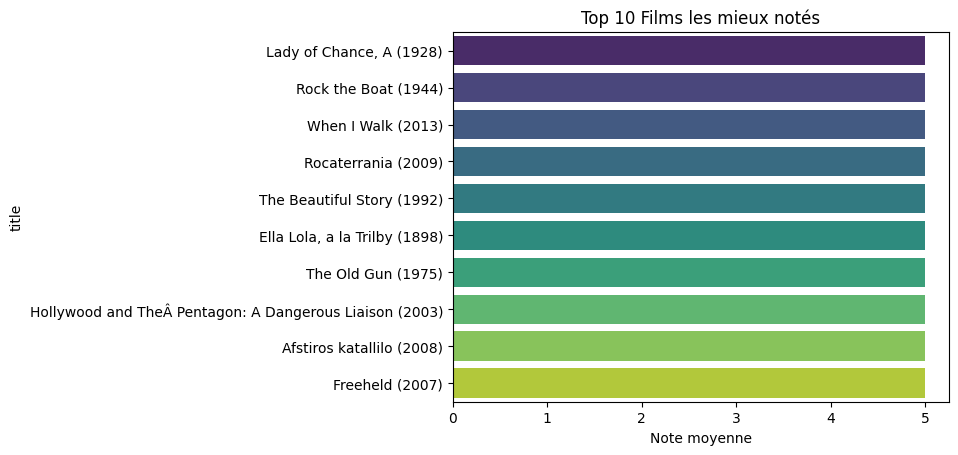

In [12]:
# Groupement par titre de livre et calculer la note moyenne
aggregated_data = df.groupby('title')['rating'].mean().reset_index()

# Tri du DataFrame agrégée par note en ordre décroissant
sorted_aggregated_data = aggregated_data.sort_values(by='rating', ascending=False)

# Sélection des 10 premiers livres les mieux notés
best_rated_books = sorted_aggregated_data.head(10)

# Affichage du graphique
sns.barplot(y='title', x='rating', data=best_rated_books, orient = 'h', palette="viridis")
plt.title(f'Top 10 Films les mieux notés')
plt.xlabel("Note moyenne");

/tmp/ipykernel_32638/4197037319.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='bayesian_avg', data=best_rated_books, orient = 'h', palette= "viridis")


Text(0.5, 0, 'Note moyenne')

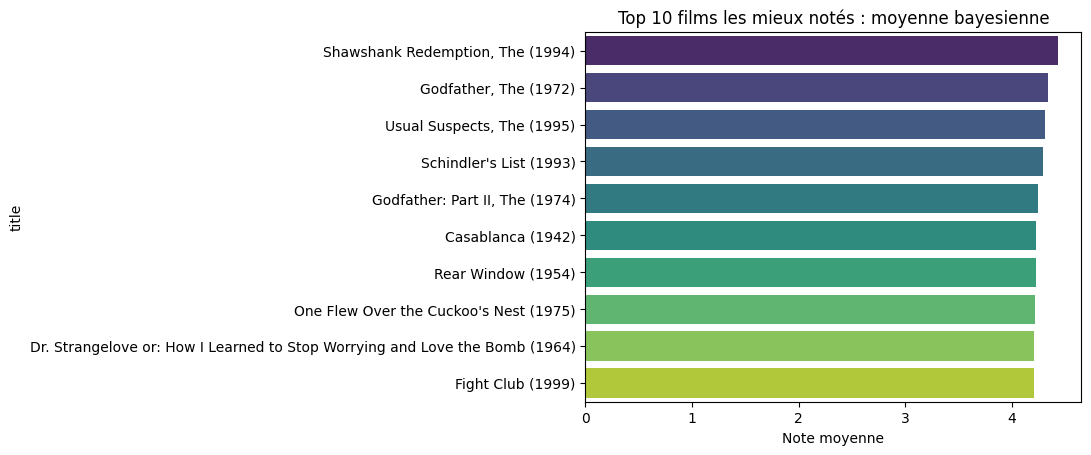

In [13]:
# On regroupe les données par titre et calcule le nombre dde notes ('count') et la note moyenne ('mean') pour chaque livre.
movie_stats = df.groupby('title')['rating'].agg(['count', 'mean']).reset_index()

# On calcule la moyenne du nombre d'avis pour tous les films.
C = movie_stats['count'].mean()

# On calcule la moyenne des notes moyennes pour tous les films.
M = movie_stats['mean'].mean()

# On définit la fonction 'bayesian_avg' qui calcule la note bayésienne pour chaque livre en utilisant les valeurs de C et M calculées précédemment.
def bayesian_avg(df):
    return (C * M + df.sum()) / (C + df.count())

# On calcule la note bayésienne pour chaque film en utilisant la fonction 'bayesian_avg'.
bayesian_avg_ratings = df.groupby('title')['rating'].agg(bayesian_avg).reset_index()

# On renomme les colonnes du DataFrame 'bayesian_avg_ratings' pour les rendre plus explicites.
bayesian_avg_ratings.columns = ['title', 'bayesian_avg']

# On fusionne 'movie_stats' avec les moyennes bayésiennes en utilisant le titre comme clé et on tri par moyenne bayesienne en ordre décroissant.
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='title').sort_values('bayesian_avg', ascending=False)

## Sélection des 10 premiers livres les mieux notés
best_rated_books = movie_stats[['title', 'bayesian_avg']].head(10)

# Affichage du graphique
sns.barplot(y='title', x='bayesian_avg', data=best_rated_books, orient = 'h', palette= "viridis")
plt.title(f'Top 10 films les mieux notés : moyenne bayesienne')
plt.xlabel("Note moyenne")